# Trabalho de redes Convolucionais.

* Professor: Vitor Casadei

* Aluno: Rivaldo da Silva

* Turma: 2022.01

### Baixar os datasets. 

* O dataset com o nome imagens_datasets se refere ao dataset com as imagens separadas por grupo.


* O dataset com o nome dataset_trabalho se refere ao dataset com as imagens separadas para realizar o estudo.

In [1]:
!git clone https://github.com/rivaldo/imagens_dataset.git 
!git clone https://github.com/rivaldo/dataset_trabalho.git

Cloning into 'imagens_dataset'...
remote: Enumerating objects: 307, done.
remote: Counting objects: 100% (307/307), done.
remote: Compressing objects: 100% (305/305), done.
remote: Total 307 (delta 5), reused 304 (delta 2), pack-reused 0
Receiving objects: 100% (307/307), 15.32 MiB | 1.28 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
import time
import copy
import os
import shutil
import re

In [3]:
base_dir = "imagens_estudo"
try:
    os.makedirs("imagens_estudo")
except OSError:
    print ("Falha ao criar diretório %s falhou")
else:
    print ("Diretório criado com sucesso %s ")
dataset_dir = "imagens_dataset/train"

Diretório criado com sucesso %s 


In [4]:
# Criar diretórios de treinamento.
files = os.listdir(base_dir)

In [5]:
def train_maker(name):
  try:
      path = f"{base_dir}/train/{name}"
      os.makedirs(path, exist_ok=True)
  except OSError:
      print ("Creation of the directory failed")
  else:
      print ("Successfully created the directory")
  print("here")
  train_dir = f"{base_dir}/train/{name}"
  print(train_dir)
  files = os.listdir(dataset_dir)
  #print(files)
  
  for f in files:
        search_object = re.search(name.lower(), f)
        print(search_object)
        if search_object:
          shutil.move(f'{dataset_dir}/{f}', train_dir)

In [6]:
train_maker('ave')

Successfully created the directory
here
imagens_estudo/train/ave
None
None
None
None
None
<re.Match object; span=(0, 3), match='ave'>
None
None
<re.Match object; span=(0, 3), match='ave'>
None
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(0, 3), match='ave'>
<re.Match object; span=(0, 3), match='ave'>
None
None
None
None
None
<re.Match object; span=(0, 3), match='ave'>
<re.Match object; span=(0, 3), match='ave'>
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(0, 3), match='ave'>
<re.Match object; span=(0, 3), match='ave'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(0, 3), match='ave'>
<re.Match object; span=(0, 3), match='ave'>
None
<re.Match object; span=(0, 3), match='ave'>
None
None
None
None
None
None
None
<re.Match object; span=(0, 3), match='ave'>
None
None
None
None
None
<re.Match object; span=(0, 3), match='ave'>
<re.Match object; span=(0, 3), match='ave'>
None
None

In [7]:
train_maker('flores')

Successfully created the directory
here
imagens_estudo/train/flores
None
<re.Match object; span=(0, 6), match='flores'>
None
None
None
None
None
None
None
<re.Match object; span=(0, 6), match='flores'>
<re.Match object; span=(0, 6), match='flores'>
None
None
None
None
None
None
<re.Match object; span=(0, 6), match='flores'>
<re.Match object; span=(0, 6), match='flores'>
None
None
None
None
None
None
None
None
None
<re.Match object; span=(0, 6), match='flores'>
<re.Match object; span=(0, 6), match='flores'>
None
<re.Match object; span=(0, 6), match='flores'>
None
None
<re.Match object; span=(0, 6), match='flores'>
<re.Match object; span=(0, 6), match='flores'>
<re.Match object; span=(0, 6), match='flores'>
None
<re.Match object; span=(0, 6), match='flores'>
<re.Match object; span=(0, 6), match='flores'>
None
None
None
<re.Match object; span=(0, 6), match='flores'>
None
<re.Match object; span=(0, 6), match='flores'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
No

In [8]:
train_maker('gato')

Successfully created the directory
here
imagens_estudo/train/gato
<re.Match object; span=(0, 4), match='gato'>
<re.Match object; span=(0, 4), match='gato'>
None
None
None
None
<re.Match object; span=(0, 4), match='gato'>
None
<re.Match object; span=(0, 4), match='gato'>
<re.Match object; span=(0, 4), match='gato'>
<re.Match object; span=(0, 4), match='gato'>
<re.Match object; span=(0, 4), match='gato'>
None
<re.Match object; span=(0, 4), match='gato'>
None
None
None
None
None
None
None
<re.Match object; span=(0, 4), match='gato'>
None
None
None
None
None
<re.Match object; span=(0, 4), match='gato'>
None
None
<re.Match object; span=(0, 4), match='gato'>
None
<re.Match object; span=(0, 4), match='gato'>
None
<re.Match object; span=(0, 4), match='gato'>
<re.Match object; span=(0, 4), match='gato'>
None
None
<re.Match object; span=(0, 4), match='gato'>
None
None
None
None
None
None
None
None
<re.Match object; span=(0, 4), match='gato'>
None
None
None
<re.Match object; span=(0, 4), match='g

In [9]:
train_maker('moto')

Successfully created the directory
here
imagens_estudo/train/moto
<re.Match object; span=(0, 4), match='moto'>
<re.Match object; span=(0, 4), match='moto'>
None
<re.Match object; span=(0, 4), match='moto'>
None
None
None
<re.Match object; span=(0, 4), match='moto'>
<re.Match object; span=(0, 4), match='moto'>
None
None
<re.Match object; span=(0, 4), match='moto'>
None
None
<re.Match object; span=(0, 4), match='moto'>
<re.Match object; span=(0, 4), match='moto'>
None
None
<re.Match object; span=(0, 4), match='moto'>
None
<re.Match object; span=(0, 4), match='moto'>
<re.Match object; span=(0, 4), match='moto'>
None
<re.Match object; span=(0, 4), match='moto'>
<re.Match object; span=(0, 4), match='moto'>
<re.Match object; span=(0, 4), match='moto'>
<re.Match object; span=(0, 4), match='moto'>
None
None
None
<re.Match object; span=(0, 4), match='moto'>
<re.Match object; span=(0, 4), match='moto'>
<re.Match object; span=(0, 4), match='moto'>
None
None
None
None
<re.Match object; span=(0, 4)

In [10]:
train_maker('carro')

Successfully created the directory
here
imagens_estudo/train/carro
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match object; span=(0, 5), match='carro'>
<re.Match obj

In [11]:
try:
    path = base_dir + "/val/ave"
    os.makedirs(path, exist_ok=True)
    path = base_dir + "/val/carro"
    os.makedirs(path, exist_ok=True)
    path = base_dir + "/val/flores"
    os.makedirs(path, exist_ok=True)
    path = base_dir + "/val/gato"
    os.makedirs(path, exist_ok=True)
    path = base_dir + "/val/moto"
    os.makedirs(path, exist_ok=True)
except OSError:
    print ("Creation of the directory failed")
else:
    print ("Successfully created the directory")

Successfully created the directory


In [12]:
ave_train = base_dir + "/train/ave"
ave_val = base_dir + "/val/ave/"
ave_files = os.listdir(ave_train)

In [13]:
carro_train = base_dir + "/train/carro/"
carro_val = base_dir + "/val/carro/"
carro_files = os.listdir(carro_train)

In [14]:
flores_train = base_dir + "/train/flores"
flores_val = base_dir + "/val/flores/"
flores_files = os.listdir(flores_train)

In [15]:
gato_train = base_dir + "/train/gato"
gato_val = base_dir + "/val/gato/"
gato_files = os.listdir(gato_train)

In [16]:
moto_train = base_dir + "/train/moto"
moto_val = base_dir + "/val/moto/"
moto_files = os.listdir(moto_train)

In [17]:
print(ave_files)
print(carro_files)
print(gato_files)
print(flores_files)
print(moto_files)

['ave (21).JPG', 'ave (3).JPG', 'ave (9).jpg', 'ave (22).JPG', 'ave (16).JPG', 'ave (18).JPG', 'ave (1).jpg', 'ave (27).jpg', 'ave (24).JPG', 'ave (25).JPG', 'ave (28).jpg', 'ave (8).jpg', 'ave (12).jpg', 'ave (2).jpg', 'ave (13).jpg', 'ave (23).JPG', 'ave (10).jpg', 'ave (14).jpg', 'ave (15).JPG', 'ave (5).jpg', 'ave (11).jpg', 'ave (20).JPG', 'ave (4).JPG', 'ave (19).JPG', 'ave (7).jpg', 'ave (6).jpg', 'ave (26).jpg', 'ave (17).JPG']
['carro (59).jpg', 'carro (55).jpg', 'carro (34).jpg', 'carro (58).jpg', 'carro (44).jpg', 'carro (56).jpg', 'carro (51).jpg', 'carro (54).jpg', 'carro (60).jpg', 'carro (52).jpg', 'carro (62).jpg', 'carro (57).jpg', 'carro (40).jpg', 'carro (36).jpg', 'carro (29).jpg', 'carro (31).jpg', 'carro (35).jpg', 'carro (43).jpg', 'carro (33).jpg', 'carro (42).jpg', 'carro (37).jpg', 'carro (32).jpg', 'carro (48).jpg', 'carro (46).jpg', 'carro (41).jpg', 'carro (53).jpg', 'carro (39).jpg', 'carro (50).jpg', 'carro (45).jpg', 'carro (30).jpg', 'carro (38).jpg', '

#### Vamos realizar a separação para testar e validar o algoritmo. 

* Optamos por fazer um for e reduzir o maximo possível o numero de fotos para o treinamento.

* No meu entendimento, com uma quantidade menor de fotos para treinar e observando a acurácia do treinamento eu posso ver o quanto meu algoritmo é confiável. Porque ele teve pouco material para treinar e mesmo assim está apresentado uma boa acuracia.

In [18]:
x = range(1, 25, 1)
for n in x:
    validationAveSearchObj = ave_files[n]
    if validationAveSearchObj:
        shutil.move(f'{ave_train}/{ave_files[n]}', ave_val)

In [19]:
x = range(1, 25, 1)
for n in x:
    validationAveSearchObj = carro_files[n]
    if validationAveSearchObj:
        shutil.move(f'{carro_train}/{carro_files[n]}', carro_val)

In [20]:
x = range(1, 25, 1)
for n in x:
    validationAveSearchObj = gato_files[n]
    if validationAveSearchObj:
        shutil.move(f'{gato_train}/{gato_files[n]}', gato_val)

In [21]:
x = range(1, 25, 1)
for n in x:
    validationAveSearchObj = flores_files[n]
    if validationAveSearchObj:
        shutil.move(f'{flores_train}/{flores_files[n]}', flores_val)

In [22]:
x = range(1, 25, 1)
for n in x:
    validationAveSearchObj = moto_files[n]
    if validationAveSearchObj:
        shutil.move(f'{moto_train}/{moto_files[n]}', moto_val)

In [23]:
print(torch.__version__)

2.0.0+cpu


In [24]:
mean_nums = [0.485, 0.456, 0.406]
std_nums = [0.229, 0.224, 0.225]

chosen_transforms = {'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean_nums, std_nums)
]), 'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean_nums, std_nums)
]),
}

In [25]:
# Set the directory for the data
data_dir = 'imagens_estudo/'

# Use the image folder function to create datasets
chosen_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), chosen_transforms[x]) for x in ['train', 'val']}

In [26]:
chosen_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 28
     Root location: imagens_estudo/train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(256, 256), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=warn)
                RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 'val': Dataset ImageFolder
     Number of datapoints: 120
     Root location: imagens_estudo/val
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            )}

In [27]:
# Make iterables with the dataloaders
dataloaders = {x: torch.utils.data.DataLoader(chosen_datasets[x], batch_size=4,
  shuffle=True, num_workers=4)
              for x in ['train', 'val']}

In [28]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f23eafc5ee0>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7f23eafc52e0>}

In [29]:
dataset_sizes = {x: len(chosen_datasets[x]) for x in ['train', 'val']}
class_names = chosen_datasets['train'].classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Como é possível observar, temos um numero bem reduzidos de fotos para treinar.

In [30]:
print(dataset_sizes)
print(class_names)

{'train': 28, 'val': 120}
['ave', 'carro', 'flores', 'gato', 'moto']


In [31]:
# Visualize some images
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([mean_nums])
    std = np.array([std_nums])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # Pause a bit so that plots are updated

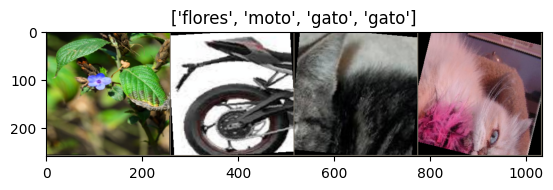

In [32]:
# Grab some of the training data to visualize
inputs, classes = next(iter(dataloaders['train']))

# Now we construct a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [33]:
res_mod = models.resnet34(pretrained=True)

num_ftrs = res_mod.fc.in_features
res_mod.fc = nn.Linear(num_ftrs, 5)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [34]:
for name, child in res_mod.named_children():
    print(name)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc


In [35]:
res_mod = res_mod.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(res_mod.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [36]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            current_loss = 0.0
            current_corrects = 0

            # Here's where the training happens
            print('Iterating through data...')

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # We need to zero the gradients, don't forget it
                optimizer.zero_grad()

                # Time to carry out the forward training poss
                # We only need to log the loss stats if we are in training phase
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # We want variables to hold the loss statistics
                current_loss += loss.item() * inputs.size(0)
                current_corrects += torch.sum(preds == labels.data)

            epoch_loss = current_loss / dataset_sizes[phase]
            epoch_acc = current_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # Make a copy of the model if the accuracy on the validation set has improved
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_since = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_since // 60, time_since % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # Now we'll load in the best model weights and return it
    model.load_state_dict(best_model_wts)
    return model

In [37]:
base_model = train_model(res_mod, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=3)

Epoch 0/2
----------
Iterating through data...


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


train Loss: 1.7134 Acc: 0.3214
Iterating through data...
val Loss: 1.3037 Acc: 0.4250

Epoch 1/2
----------
Iterating through data...
train Loss: 1.2699 Acc: 0.4643
Iterating through data...
val Loss: 0.9738 Acc: 0.7083

Epoch 2/2
----------
Iterating through data...
train Loss: 1.1650 Acc: 0.5000
Iterating through data...
val Loss: 0.5323 Acc: 0.9000

Training complete in 1m 36s
Best val Acc: 0.900000


#### Acima é possível observar acima, o algoritmo conseguiu uma acuracia de 90%, que é muito bom.

In [38]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_handeled = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_handeled += 1
                ax = plt.subplot(num_images//2, 2, images_handeled)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_handeled == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

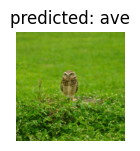

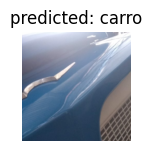

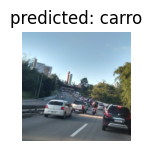

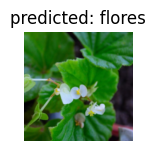

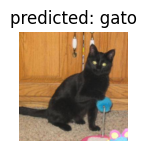

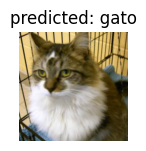

In [39]:
visualize_model(base_model)
plt.show()

In [40]:
torch.save(base_model.state_dict(), '/home/administrador/trabalho_redes_convolucionais/models/test/test.pt' )

In [41]:
base_model.load_state_dict(torch.load('/home/administrador/trabalho_redes_convolucionais/models/test/test.pt' ))
base_model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  